<h1>Step 3 Data Exploration<h1>

<h3>The first reserch question of this project is focused on the relationship beween popularity (i.e. number of shares) & features of article. Data visualization is used to analysis the relations between features and target variable. Bar charts and scatter plot indicate that number of shares is related to article category, published day, and number of words. <h3>



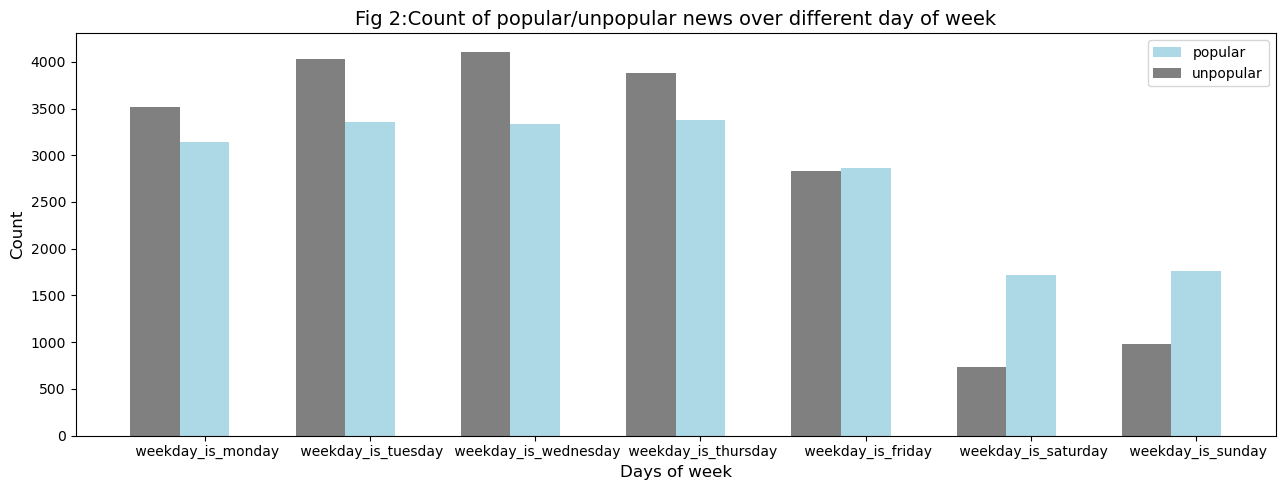

In [13]:
# Visualize the feature of different day of week
columns_day = df.columns.values[31:38]

unpopular=df[df[' shares']<=1400]
popular=df[df[' shares']>1400]
unpopular_day = unpopular[columns_day].sum().values
popular_day = popular[columns_day].sum().values


from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize = (13,5))
plt.title("Fig 2:Count of popular/unpopular news over different day of week", fontsize = 14)
plt.bar(np.arange(len(columns_day)), popular_day, width = 0.3, align="center", color = 'lightblue', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpopular_day, width = 0.3, align = "center", color = 'grey', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()  

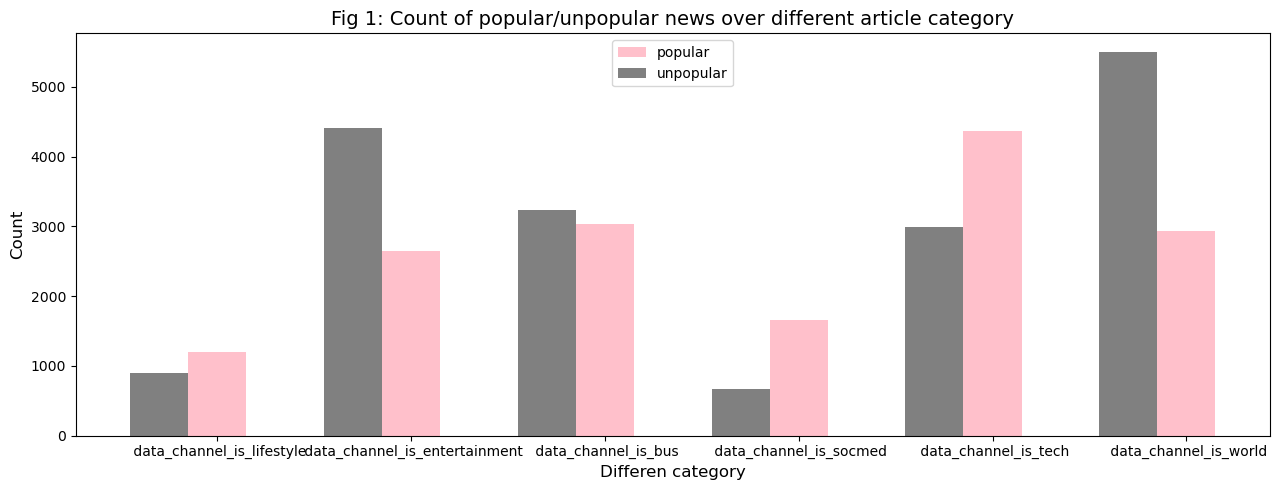

In [14]:
# Visualize the feature of different article category
columns_channel=df.columns.values[13:19]
unpop_channel = unpopular[columns_channel].sum().values
pop_channel = popular[columns_channel].sum().values
figure = plt.figure(figsize = (13,5))
plt.title("Fig 1: Count of popular/unpopular news over different article category", fontsize = 14)
plt.bar(np.arange(len(columns_channel)), pop_channel, width = 0.3, align="center", color = 'pink', \
          label = "popular")
plt.bar(np.arange(len(columns_channel)) - 0.3, unpop_channel, width = 0.3, align = "center", color = 'grey', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_channel)), columns_channel)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("Differen category", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.savefig("chan.pdf")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

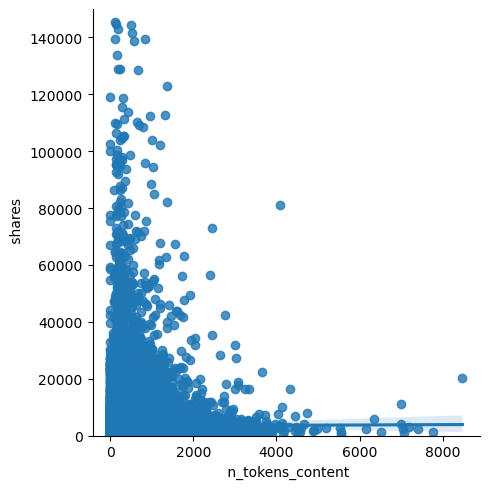

In [15]:
#run scatter plot to see relationship between number of words and number of shares 
sns.lmplot(x=" n_tokens_content", y=" shares", data=df)
plt.ylim(0,150000)
plt.show

In [249]:
# n_tokens_content represents # of words in the content. If = 0, i.e. no content in the article. 
num_of_nowords=df[df[' n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 0


In [250]:
# These rows are not relevant and can be eliminated.

df = df[df[' n_tokens_content'] != 0]

In [251]:
df.shape

(38463, 61)

In [252]:
# removing duplicates
df=df.drop_duplicates()

In [253]:
df.shape

(38463, 61)

In [254]:
# Drop the column url and timedelta which are irrelevant variables 
df2 = df.drop(df.columns[[0,1]], axis=1)

# remove space in headers 
df2.columns = df2.columns.str.replace(' ', '')


In [255]:
df2.shape

(38463, 59)

(array([10953., 13633.,  4971.,  2536.,  1423.,   957.,   715.,   499.,
          352.,   346.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

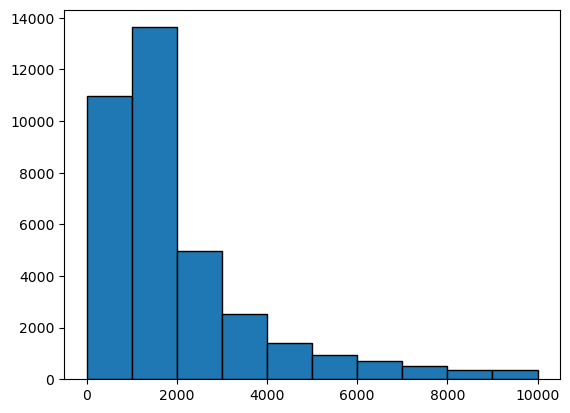

In [180]:
#plot the distribution of variable shares
#based on panda profiling report, 95th percentile is 10,800 
plt.hist(df2['shares'],edgecolor='black',range = [0,10000])

In [256]:

# Bin edges that will be used to divide the data into groups
bin_edges = [0,950,1400,845000]

# Labels for the  levels
bin_names = [1, 2,3] 

# Creates share levels column
df2['shares_levels'] = pd.cut(df2['shares'], bin_edges, labels=bin_names)

In [257]:

# Checks the proportion of each group
#median 1400 is threshold for defining as popular 
# Group 1 unpopular group, Group 2  normal, Group 3  popular

df2.groupby('shares_levels').shares.count()/df2.shares.count()

shares_levels
1    0.253412
2    0.254894
3    0.491693
Name: shares, dtype: float64

In [258]:
df2.shape

(38463, 60)

In [259]:
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [260]:
#feature list

features = df2.drop(df2.columns[[-1,-2]], axis=1)
features



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


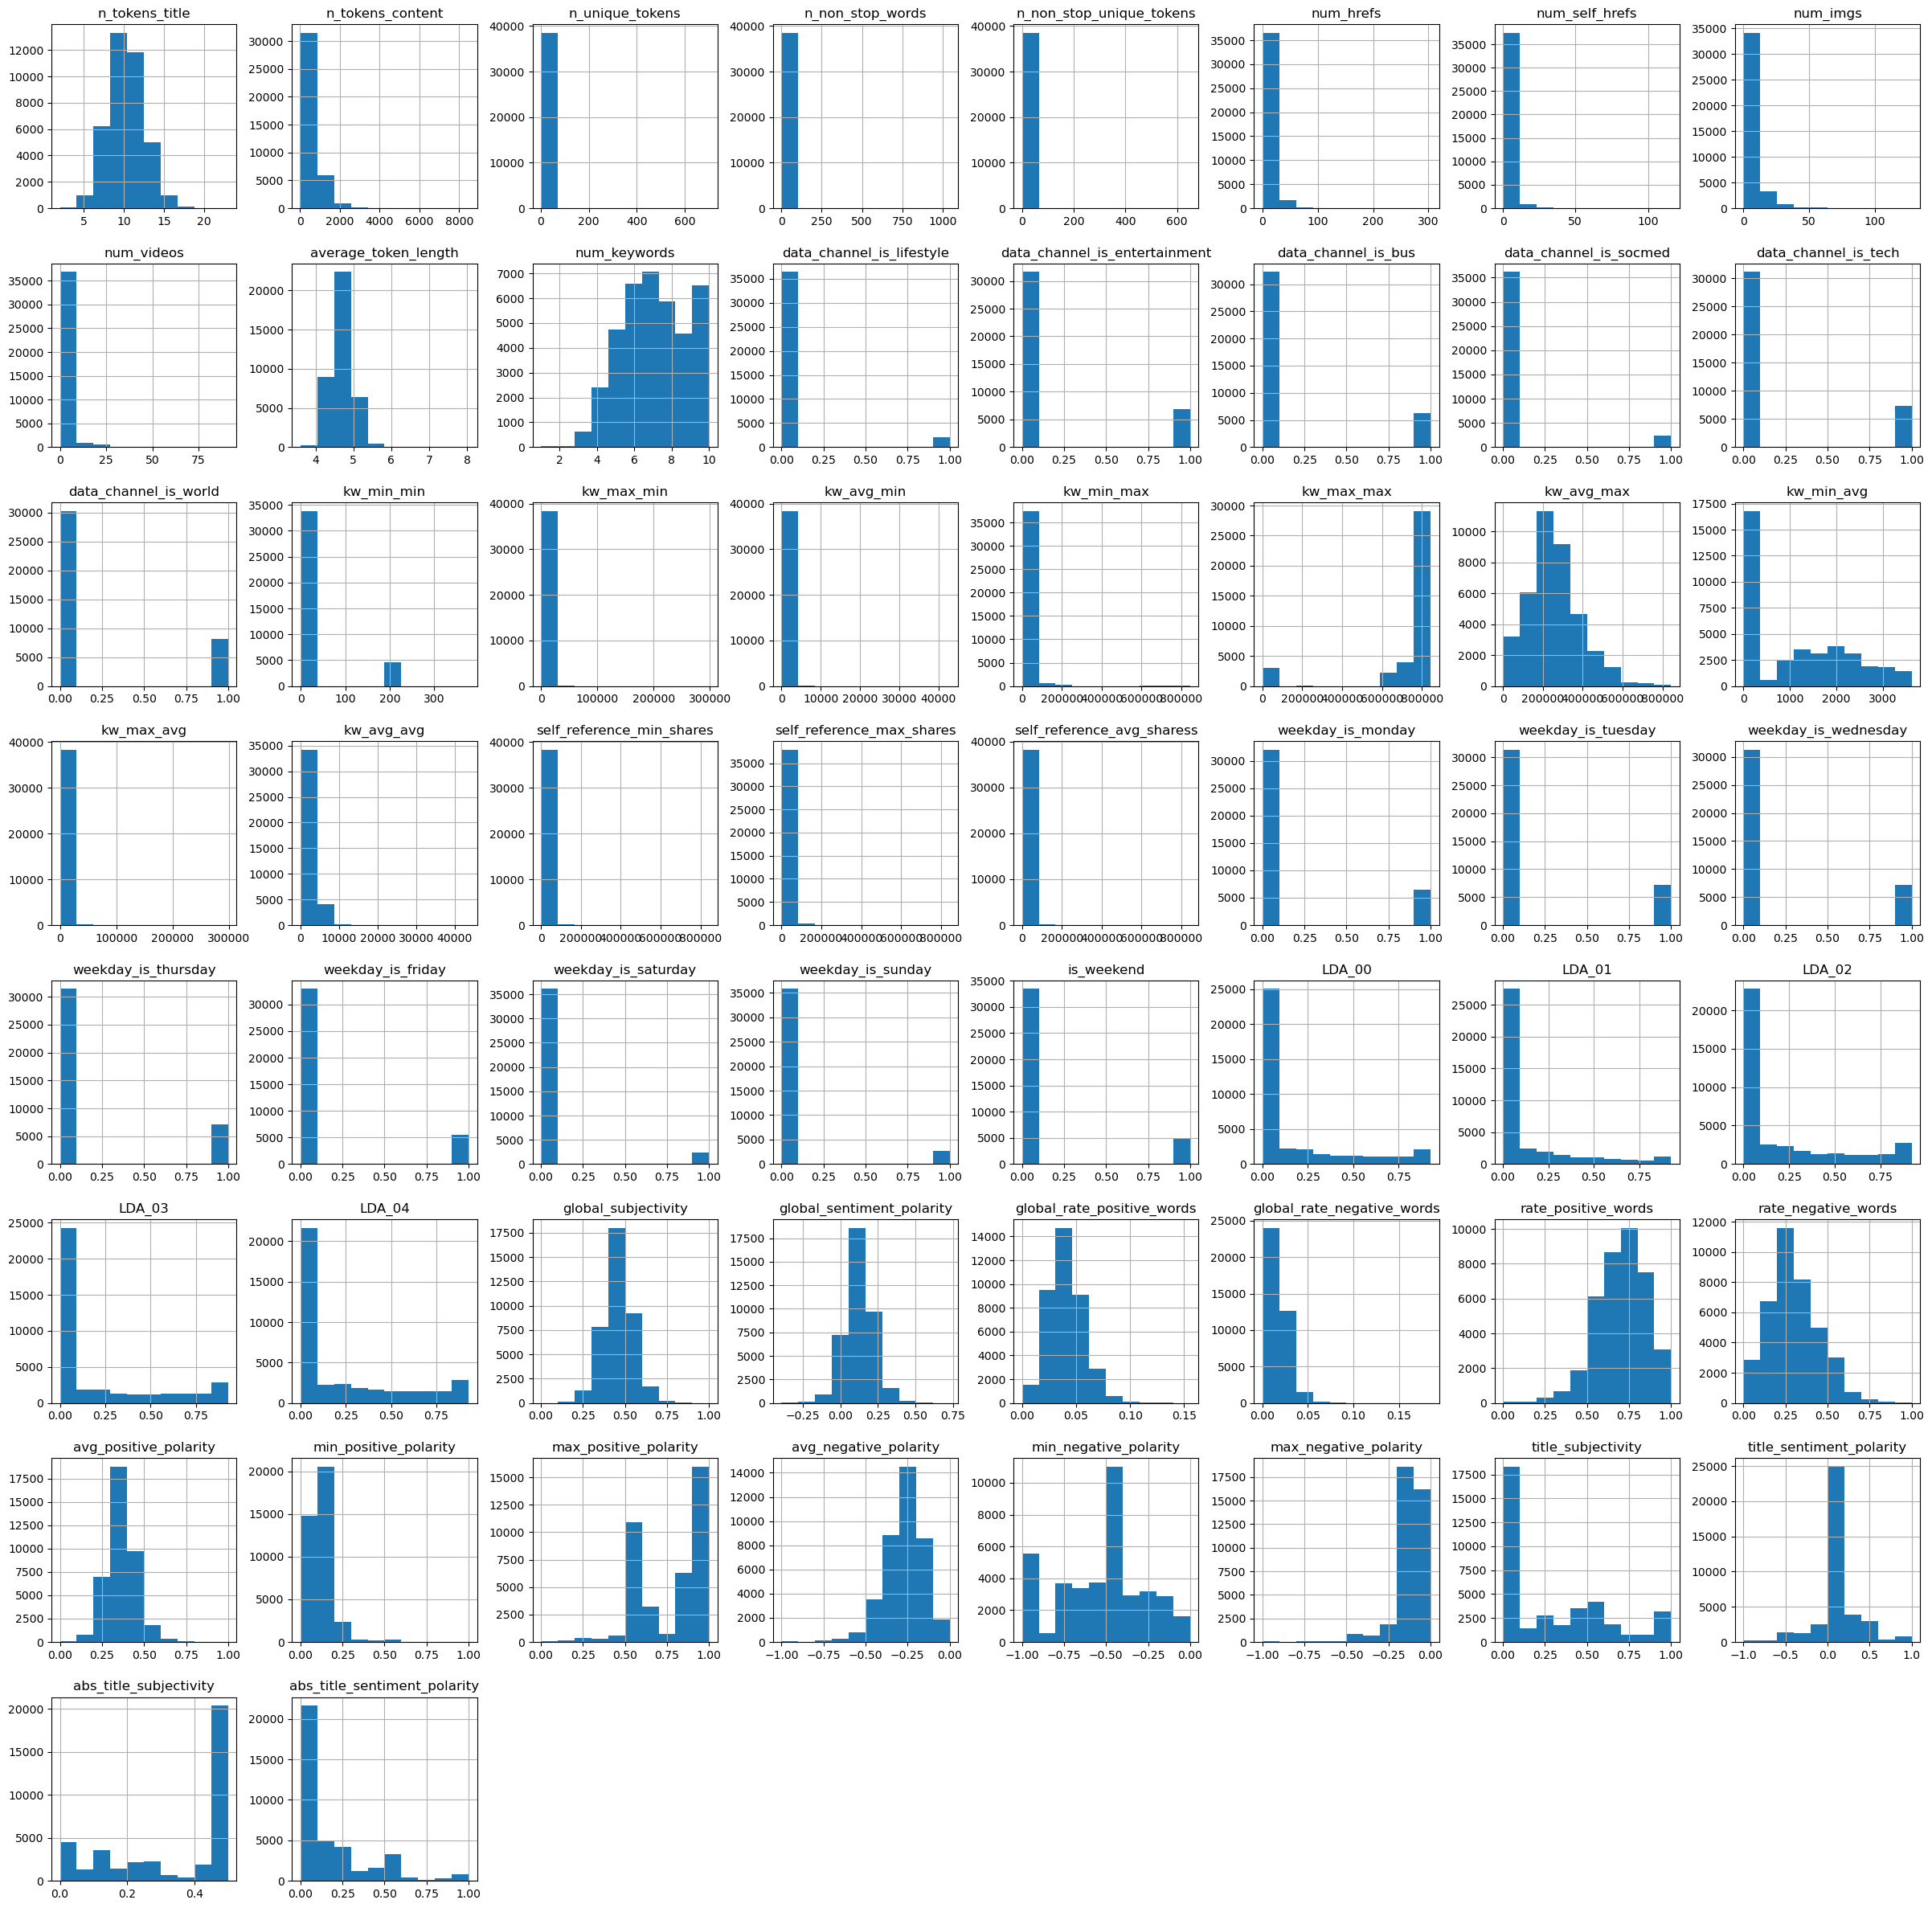

In [261]:
X= features 
y=df2['shares_levels']  

X.hist(figsize=(30,30))
plt.show()


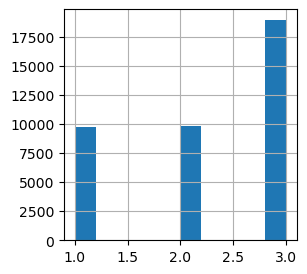

In [92]:
y.hist(figsize=(3,3))
plt.show()

In [262]:


# df2_cat dataframe contains catagoricl features.

df2_cat=df2[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

# df2_num  dataframe contains numerical feaures.
# Drop target variables from df2_num


df2_num=df2.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",'shares','shares_levels'],axis=1)

In [263]:

df2_cat.shape

(38463, 14)

In [264]:
df2_num.shape

(38463, 44)

In [265]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<0).any()]
negcols



Index(['kw_min_min', 'kw_avg_min', 'kw_min_avg', 'global_sentiment_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_sentiment_polarity'],
      dtype='object')

In [266]:
# print out all the one-hot encoding columns of data_channel
df2.iloc[0, 11:17]


data_channel_is_lifestyle        0.0
data_channel_is_entertainment    1.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
Name: 0, dtype: float64

In [267]:
# print out all the one-hot encoding columns of weekday
df2.iloc[0, 29:37]

weekday_is_monday       1.0
weekday_is_tuesday      0.0
weekday_is_wednesday    0.0
weekday_is_thursday     0.0
weekday_is_friday       0.0
weekday_is_saturday     0.0
weekday_is_sunday       0.0
is_weekend              0.0
Name: 0, dtype: float64

In [268]:
# Create new columns to store the combined version of each.
df2['weekday'] = None
df2['data_channel'] = None


In [269]:
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [270]:
# Converting them into single columns
# 61 is the location where data_channel is at is the column list.
# 60 is the location where weekday is at is the column list.
# 1=Monday 2= Tuesday 3= Wednesday 4= Thursday 5=Friday 6=Saturday 7=Sunday
# 1=lifestyle 2=entertainment 3=bus 4=socmed 5=tech 6=world 0=not belong to any of these cateogries


for i in range(df2.shape[0]):
                
    if df2.iloc[i, 29] == 1:
        df2.iloc[i, 60] = 1
    elif df2.iloc[i, 30] == 1:
        df2.iloc[i, 60] = 2
    elif df2.iloc[i, 31] == 1:
        df2.iloc[i, 60] = 3
    elif df2.iloc[i, 32] == 1:
        df2.iloc[i, 60] = 4
    elif df2.iloc[i, 33] == 1:
        df2.iloc[i, 60] = 5
    elif df2.iloc[i, 34] == 1:
        df2.iloc[i, 60] = 6
    elif df2.iloc[i, 35] == 1:
        df2.iloc[i, 60] = 7
        
for i in range(df2.shape[0]):
    if df2.iloc[i, 11] == 1:
        df2.iloc[i, 61] = 1
    elif df2.iloc[i, 12] == 1:
        df2.iloc[i, 61] = 2
    elif df2.iloc[i, 13] == 1:
        df2.iloc[i, 61] = 3
    elif df2.iloc[i, 14] == 1:
        df2.iloc[i, 61] = 4
    elif df2.iloc[i, 15] == 1:
        df2.iloc[i, 61] = 5
    elif df2.iloc[i, 16] == 1:
        df2.iloc[i, 61] = 6

In [271]:
df2.shape

(38463, 62)

In [272]:
# check if there is any null value in these two new columns:
#some articles not belong to either of these channel 

df2[["data_channel", "weekday"]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_channel  32972 non-null  object
 1   weekday       38463 non-null  object
dtypes: object(2)
memory usage: 901.5+ KB


In [273]:
# fill out the empty rows with "0" - i.e. not belong to any of the channel category
df2.data_channel = df2.data_channel.fillna(0)

In [274]:
# check if there is any null value in these two new columns again:
df2[["data_channel", "weekday"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_channel  38463 non-null  int64 
 1   weekday       38463 non-null  object
dtypes: int64(1), object(1)
memory usage: 901.5+ KB


In [275]:
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [276]:
df2.shape

(38463, 62)

In [277]:
df2.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_levels,weekday,data_channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,1,2
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,1,3
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3,1,3
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2,1,2
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,1,5
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855,1,1,5
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556,1,1,1
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891,1,1,5
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,3,1,5
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710,1,1,6


In [278]:
df2.shape

(38463, 62)

In [279]:
df3 = df2.drop(df2.columns[[29,30,31,32,33,34,35,36,11,12,13,14,15,16]], axis=1)

In [280]:
df3.head(1)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_levels,weekday,data_channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593,1,1,2
